#### grp

# An Introduction to Statistical Learning:
-  Lab
-  Applied
-  Exercise Solutions (**unofficial**) => https://rpubs.com/ppaquay/65560

## _4.6 Lab: Logistic Regression, LDA, QDA, and KNN_

### _4.6.1 The Stock Market Data_

In [1]:
library(ISLR)
names(Smarket)
dim(Smarket)

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

[1] 1250    9

In [2]:
head(Smarket)

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
2001,0.213,0.614,-0.623,1.032,0.959,1.3491,1.392,Up


In [3]:
summary(Smarket)

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

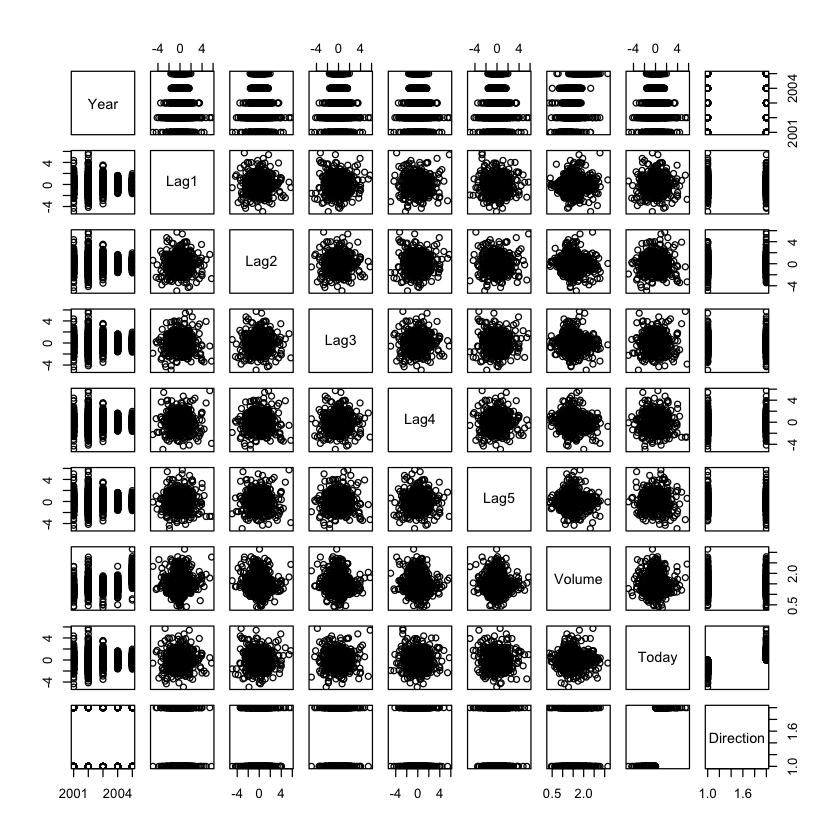

In [4]:
pairs(Smarket)

In [5]:
cor(Smarket[,-9]) # remove categorical variable(s)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,0.029699649,0.030596422,0.033194581,0.035688718,0.029787995,0.53900647,0.030095229
Lag1,0.02969965,1.000000000,-0.026294328,-0.010803402,-0.002985911,-0.005674606,0.04090991,-0.026155045
Lag2,0.03059642,-0.026294328,1.000000000,-0.025896670,-0.010853533,-0.003557949,-0.04338321,-0.010250033
Lag3,0.03319458,-0.010803402,-0.025896670,1.000000000,-0.024051036,-0.018808338,-0.04182369,-0.002447647
Lag4,0.03568872,-0.002985911,-0.010853533,-0.024051036,1.000000000,-0.027083641,-0.04841425,-0.006899527
Lag5,0.02978799,-0.005674606,-0.003557949,-0.018808338,-0.027083641,1.000000000,-0.02200231,-0.034860083
Volume,0.53900647,0.040909908,-0.043383215,-0.041823686,-0.048414246,-0.022002315,1.00000000,0.014591823
Today,0.03009523,-0.026155045,-0.010250033,-0.002447647,-0.006899527,-0.034860083,0.01459182,1.000000000


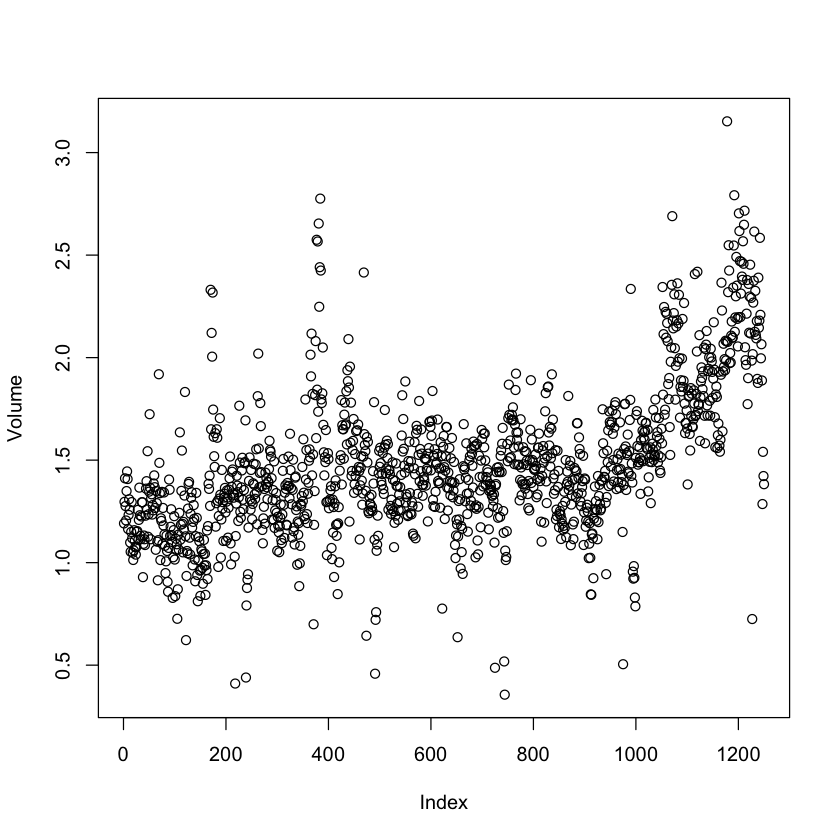

In [6]:
attach(Smarket)
plot(Volume)

### _4.6.2 Logistic Regression_

In [7]:
glm.fit=glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume,
           data=Smarket, family=binomial)
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


In [8]:
coef(glm.fit)

(Intercept)         Lag1         Lag2         Lag3         Lag4         Lag5 
-0.126000257 -0.073073746 -0.042301344  0.011085108  0.009358938  0.010313068 
      Volume 
 0.135440659

In [9]:
summary(glm.fit)$coef

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-0.126000257,0.24073574,-0.5233966,0.6006983
Lag1,-0.073073746,0.05016739,-1.4565986,0.1452272
Lag2,-0.042301344,0.05008605,-0.8445733,0.3983491
Lag3,0.011085108,0.04993854,0.2219750,0.8243333
Lag4,0.009358938,0.04997413,0.1872757,0.8514445
Lag5,0.010313068,0.04951146,0.2082966,0.8349974
Volume,0.135440659,0.15835970,0.8552723,0.3924004


In [10]:
summary(glm.fit)$coef[,4] # p-values for coefficients

(Intercept)        Lag1        Lag2        Lag3        Lag4        Lag5 
  0.6006983   0.1452272   0.3983491   0.8243333   0.8514445   0.8349974 
     Volume 
  0.3924004

In [11]:
glm.probs=predict(glm.fit, type="response")
glm.probs[1:10] # first 10 prediction probas Y=1
contrasts(Direction) # target label

1         2         3         4         5         6         7         8 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812 0.5069565 0.4926509 0.5092292 
        9        10 
0.5176135 0.4888378

,Up
Down,0
Up,1


In [12]:
glm.pred=rep("Down", 1250)
glm.pred[glm.probs > .5]="Up"

In [13]:
table(glm.pred, Direction)

(507+145)/1250 # correct predictions
mean(glm.pred==Direction)

        Direction
glm.pred Down  Up
    Down  145 141
    Up    457 507

[1] 0.5216

[1] 0.5216

In [14]:
train=(Year<2005)
Smarket.2005=Smarket[!train,] # test set features
dim(Smarket.2005)
Direction.2005=Direction[!train] # test set labels

[1] 252   9

In [15]:
glm.fit=glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Smarket, family=binomial, subset=train)
glm.probs=predict(glm.fit, Smarket.2005, type="response")

In [16]:
glm.pred=rep("Down",252)
glm.pred[glm.probs>.5]="Up"
table(glm.pred,Direction.2005) # confusion matrix
mean(glm.pred==Direction.2005) # % of Down
mean(glm.pred!=Direction.2005) # % of Up

        Direction.2005
glm.pred Down Up
    Down   77 97
    Up     34 44

[1] 0.4801587

[1] 0.5198413

In [17]:
# remove uncorrelated vars
glm.fit=glm(Direction~Lag1+Lag2, data=Smarket, family=binomial, subset=train)
glm.probs=predict(glm.fit, Smarket.2005, type="response")
glm.pred=rep("Down",252)
glm.pred[glm.probs>.5]="Up"
table(glm.pred,Direction.2005)
mean(glm.pred==Direction.2005)
106/(106+76) # true positive rate

        Direction.2005
glm.pred Down  Up
    Down   35  35
    Up     76 106

[1] 0.5595238

[1] 0.5824176

In [18]:
# get some preds
predict(glm.fit,
        newdata=data.frame(Lag1=c(1.2,1.5),
                           Lag2=c(1.1,-0.8)),
        type="response")

1         2 
0.4791462 0.4960939

### _4.6.3 Linear Discriminant Analysis_

In [19]:
library(MASS)
lda.fit=lda(Direction~Lag1+Lag2, data=Smarket, subset=train)
lda.fit

# 49.2% of the training obs correspond to days when the market went DOWN

Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

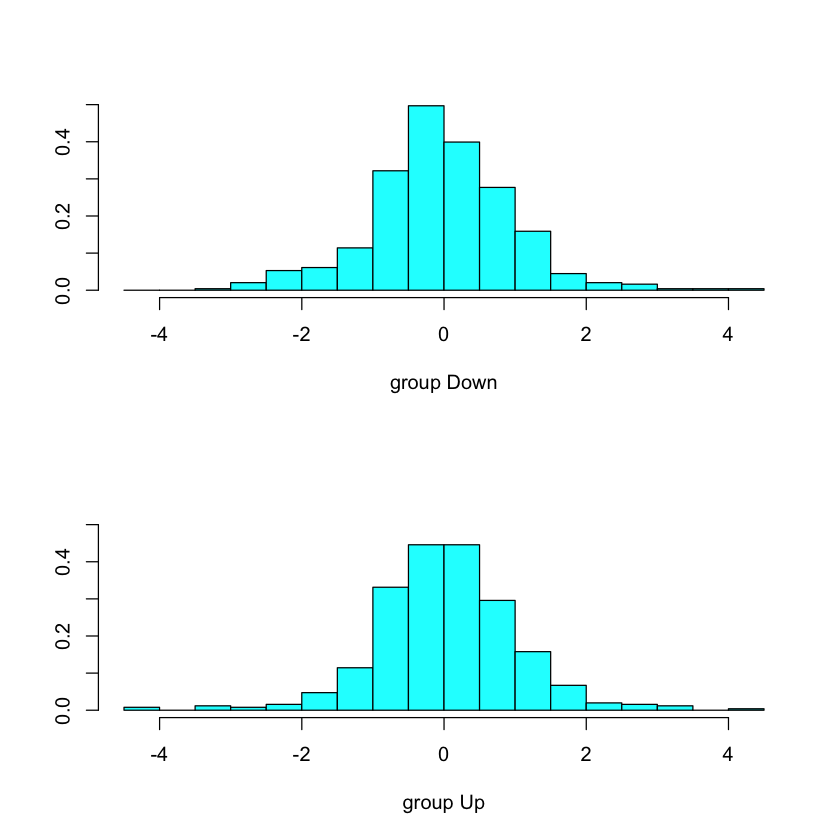

In [20]:
plot(lda.fit)

In [21]:
lda.pred=predict(lda.fit, Smarket.2005)
names(lda.pred)

# class => LDA's label preds
# posterior => class probas
# x => linear discriminants

[1] "class"     "posterior" "x"

In [22]:
lda.class=lda.pred$class
table(lda.class,Direction.2005)
mean(lda.class==Direction.2005)

         Direction.2005
lda.class Down  Up
     Down   35  35
     Up     76 106

[1] 0.5595238

In [23]:
sum(lda.pred$posterior[,1]>=.5) # total DOWN
sum(lda.pred$posterior[,1]<.5) # total UP

[1] 70

[1] 182

In [24]:
lda.pred$posterior[1:20,1]
lda.class[1:20]

999      1000      1001      1002      1003      1004      1005      1006 
0.4901792 0.4792185 0.4668185 0.4740011 0.4927877 0.4938562 0.4951016 0.4872861 
     1007      1008      1009      1010      1011      1012      1013      1014 
0.4907013 0.4844026 0.4906963 0.5119988 0.4895152 0.4706761 0.4744593 0.4799583 
     1015      1016      1017      1018 
0.4935775 0.5030894 0.4978806 0.4886331

[1] Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Down Up   Up   Up  
[16] Up   Up   Down Up   Up  
Levels: Down Up

In [25]:
sum(lda.pred$posterior[,1]>.9) # adjust threshold

[1] 0

### _4.6.4 Quadratic Discriminant Analysis_

In [26]:
library(MASS)
qda.fit=qda(Direction~Lag1+Lag2,data=Smarket,subset=train)
qda.fit # coefficients are not present because model is a quadratic

Call:
qda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

In [27]:
qda.class=predict(qda.fit,Smarket.2005)$class
table(qda.class,Direction.2005)
mean(qda.class==Direction.2005)

         Direction.2005
qda.class Down  Up
     Down   30  20
     Up     81 121

[1] 0.5992063

### _4.6.5 K-Nearest Neighbors_

In [28]:
library(class)
train.X=cbind(Lag1,Lag2)[train,]
test.X=cbind(Lag1,Lag2)[!train,]
train.Direction=Direction[train]

In [29]:
set.seed(1)
knn.pred=knn(train.X, test.X, train.Direction, k=1) # num of neighbors
table(knn.pred,Direction.2005)
(83+43)/252 # % of correct preds

        Direction.2005
knn.pred Down Up
    Down   43 58
    Up     68 83

[1] 0.5

In [30]:
knn.pred=knn(train.X, test.X, train.Direction, k=3)
table(knn.pred,Direction.2005)
mean(knn.pred==Direction.2005)

        Direction.2005
knn.pred Down Up
    Down   48 54
    Up     63 87

[1] 0.5357143

### _4.6.6 An Application to Caravan Insurance Data_

In [31]:
dim(Caravan) # shape
attach(Caravan)
summary(Purchase)
348/5822

[1] 5822   86

No  Yes 
5474  348

[1] 0.05977327

In [32]:
standardized.X=scale(Caravan[,-86])
var(Caravan[,1])
var(Caravan[,2])
var(standardized.X[,1])
var(standardized.X[,2])

# scale features to have mean of 0 and standard deviation of 1

[1] 165.0378

[1] 0.1647078

[1] 1

[1] 1

In [33]:
test=1:1000
train.X=standardized.X[-test,]
test.X=standardized.X[test,]
train.Y=Purchase[-test]
test.Y=Purchase[test]
set.seed(1)
knn.pred=knn(train.X, test.X, train.Y, k=1)
mean(test.Y!=knn.pred) # error rate
mean(test.Y!="No")

[1] 0.118

[1] 0.059

In [34]:
head(standardized.X[test,]) # scaled feature sample

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,⋯,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
1,0.68084775,-0.2725565,0.4066617,-1.21685949,0.7793384,-0.6942510,0.2174254,-0.06870474,-0.1618019,0.42763309,⋯,-0.2028925,-0.07315883,-0.08104764,-0.05991487,0.764905,-0.02270383,-0.07364394,-0.1506075,-0.08734022,-0.1188063
2,0.99221162,-0.2725565,-0.8594262,-1.21685949,0.7793384,0.3025256,-0.3653787,-0.06870474,0.4641188,-0.09606902,⋯,-0.2028925,-0.07315883,-0.08104764,-0.05991487,0.764905,-0.02270383,-0.07364394,-0.1506075,-0.08734022,-0.1188063
3,0.99221162,-0.2725565,-0.8594262,-1.21685949,0.7793384,-0.6942510,-0.3653787,0.91409379,0.4641188,-1.66717535,⋯,-0.2028925,-0.07315883,-0.08104764,-0.05991487,0.764905,-0.02270383,-0.07364394,-0.1506075,-0.08734022,-0.1188063
4,-1.18733547,-0.2725565,0.4066617,0.01075374,-0.9708962,1.2993023,-0.9481828,0.91409379,0.4641188,-0.61977113,⋯,-0.2028925,-0.07315883,-0.08104764,-0.05991487,0.764905,-0.02270383,-0.07364394,-0.1506075,-0.08734022,-0.1188063
5,1.22573452,-0.2725565,1.6727497,-1.21685949,1.4794323,0.3025256,-0.3653787,-0.06870474,0.4641188,0.42763309,⋯,-0.2028925,-0.07315883,-0.08104764,-0.05991487,0.764905,-0.02270383,-0.07364394,-0.1506075,-0.08734022,-0.1188063
6,-0.09756193,-0.2725565,-0.8594262,-2.44447272,-0.2708024,-0.6942510,0.2174254,-1.05150327,1.0900394,-3.23828168,⋯,-0.2028925,-0.07315883,-0.08104764,-0.05991487,-1.014271,-0.02270383,-0.07364394,-0.1506075,-0.08734022,-0.1188063


In [35]:
# interested in correctly predicting fraction of individuals who buy insurance

In [36]:
table(knn.pred, test.Y)
9/(68+9) # 

        test.Y
knn.pred  No Yes
     No  873  50
     Yes  68   9

[1] 0.1168831

In [37]:
knn.pred=knn(train.X, test.X, train.Y, k=3)
table(knn.pred,test.Y)
5/26

        test.Y
knn.pred  No Yes
     No  920  54
     Yes  21   5

[1] 0.1923077

In [38]:
knn.pred=knn(train.X, test.X, train.Y, k=5)
table(knn.pred,test.Y)
4/15

        test.Y
knn.pred  No Yes
     No  930  55
     Yes  11   4

[1] 0.2666667

In [39]:
glm.fits=glm(Purchase~., data=Caravan, family=binomial, subset=-test)
glm.probs=predict(glm.fits, Caravan[test,], type="response")
glm.pred=rep("No",1000)
glm.pred[glm.probs>.5]="Yes"
table(glm.pred,test.Y)
glm.pred=rep("No",1000)
glm.pred[glm.probs>.25]="Yes" # lower threshold
table(glm.pred,test.Y)
11/(22+11)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

        test.Y
glm.pred  No Yes
     No  934  59
     Yes   7   0

        test.Y
glm.pred  No Yes
     No  919  48
     Yes  22  11

[1] 0.3333333

## _Applied_

In [40]:
# 10

#### a

In [41]:
library(ISLR)
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

In [42]:
head(Weekly)

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,Down
1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,Down
1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,Up
1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,Up
1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,Up
1990,1.178,0.712,3.514,-2.576,-0.270,0.1544440,-1.372,Down


In [43]:
cor(Weekly[, -9]) # remove categorical features

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,-0.032289274,-0.03339001,-0.03000649,-0.031127923,-0.030519101,0.84194162,-0.032459894
Lag1,-0.03228927,1.000000000,-0.07485305,0.05863568,-0.071273876,-0.008183096,-0.06495131,-0.075031842
Lag2,-0.03339001,-0.074853051,1.00000000,-0.07572091,0.058381535,-0.072499482,-0.08551314,0.059166717
Lag3,-0.03000649,0.058635682,-0.07572091,1.00000000,-0.075395865,0.060657175,-0.06928771,-0.071243639
Lag4,-0.03112792,-0.071273876,0.05838153,-0.07539587,1.000000000,-0.075675027,-0.06107462,-0.007825873
Lag5,-0.03051910,-0.008183096,-0.07249948,0.06065717,-0.075675027,1.000000000,-0.05851741,0.011012698
Volume,0.84194162,-0.064951313,-0.08551314,-0.06928771,-0.061074617,-0.058517414,1.00000000,-0.033077783
Today,-0.03245989,-0.075031842,0.05916672,-0.07124364,-0.007825873,0.011012698,-0.03307778,1.000000000


#### b

In [44]:
fit.glm=glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Weekly, family=binomial)
summary(fit.glm)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


#### c

In [45]:
attach(Weekly)

The following objects are masked from Smarket:

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year



In [46]:
probs=predict(fit.glm, type="response")
pred.glm=rep("Down", length(probs))
pred.glm[probs > 0.5]="Up"
table(pred.glm, Direction)

# correct preds => (54+557)/1089=56%; error rate => 44%

        Direction
pred.glm Down  Up
    Down   54  48
    Up    430 557

#### d

In [47]:
train=(Year < 2009) # train set
Weekly.20092010=Weekly[!train, ]
Direction.20092010=Direction[!train]
fit.glm2=glm(Direction~Lag2, data=Weekly, family=binomial, subset=train)
summary(fit.glm2)


Call:
glm(formula = Direction ~ Lag2, family = binomial, data = Weekly, 
    subset = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.536  -1.264   1.021   1.091   1.368  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.20326    0.06428   3.162  0.00157 **
Lag2         0.05810    0.02870   2.024  0.04298 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1350.5  on 983  degrees of freedom
AIC: 1354.5

Number of Fisher Scoring iterations: 4


In [48]:
probs2=predict(fit.glm2, Weekly.20092010, type="response")
pred.glm2=rep("Down", length(probs2))
pred.glm2[probs2 > 0.5]="Up"
table(pred.glm2, Direction.20092010)

# correct preds => (9+56)/104=62.5%; error rate => 37.5%

         Direction.20092010
pred.glm2 Down Up
     Down    9  5
     Up     34 56

#### e

In [49]:
library(MASS)
fit.lda=lda(Direction ~ Lag2, data=Weekly, subset=train)
fit.lda

Call:
lda(Direction ~ Lag2, data = Weekly, subset = train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

Coefficients of linear discriminants:
           LD1
Lag2 0.4414162

In [50]:
pred.lda=predict(fit.lda, Weekly.20092010)
table(pred.lda$class, Direction.20092010)

# correct preds => 62.5%; error rate => 37.5%

      Direction.20092010
       Down Up
  Down    9  5
  Up     34 56

#### f

In [51]:
fit.qda=qda(Direction ~ Lag2, data=Weekly, subset=train)
fit.qda

Call:
qda(Direction ~ Lag2, data = Weekly, subset = train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

In [52]:
pred.qda=predict(fit.qda, Weekly.20092010)
table(pred.qda$class, Direction.20092010)

# correct preds => 59%; error rate => 41% 

      Direction.20092010
       Down Up
  Down    0  0
  Up     43 61

#### g

In [53]:
library(class)
train.X=as.matrix(Lag2[train])
test.X=as.matrix(Lag2[!train])
train.Direction=Direction[train]

set.seed(1)
pred.knn=knn(train.X, test.X, train.Direction, k=1)
table(pred.knn, Direction.20092010)

# correct preds => 50%; error rate => 50%

        Direction.20092010
pred.knn Down Up
    Down   21 30
    Up     22 31

#### h

In [54]:
# log reg and lda have lowest test error rates

#### i

In [55]:
# try different combos of features

In [56]:
# 11

#### a

In [57]:
attach(Auto)
mpg01=rep(0, length(mpg))
mpg01[mpg > median(mpg)]=1
Auto=data.frame(Auto, mpg01)

In [58]:
head(Auto)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,0
15,8,350,165,3693,11.5,70,1,buick skylark 320,0
18,8,318,150,3436,11.0,70,1,plymouth satellite,0
16,8,304,150,3433,12.0,70,1,amc rebel sst,0
17,8,302,140,3449,10.5,70,1,ford torino,0
15,8,429,198,4341,10.0,70,1,ford galaxie 500,0


#### b

In [59]:
cor(Auto[, -9])

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088,0.8369392
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316,-0.7591939
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351,-0.7534766
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715,-0.6670526
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054,-0.7577566
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458,0.3468215
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277,0.4299042
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000,0.5136984
mpg01,0.8369392,-0.7591939,-0.7534766,-0.6670526,-0.7577566,0.3468215,0.4299042,0.5136984,1.0000000


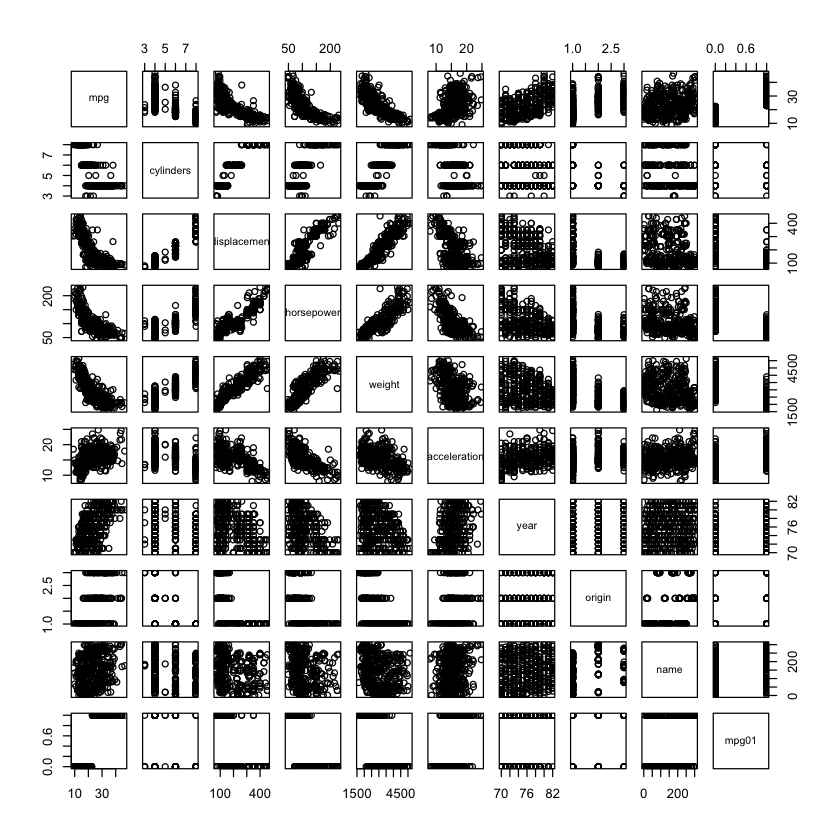

In [60]:
pairs(Auto)

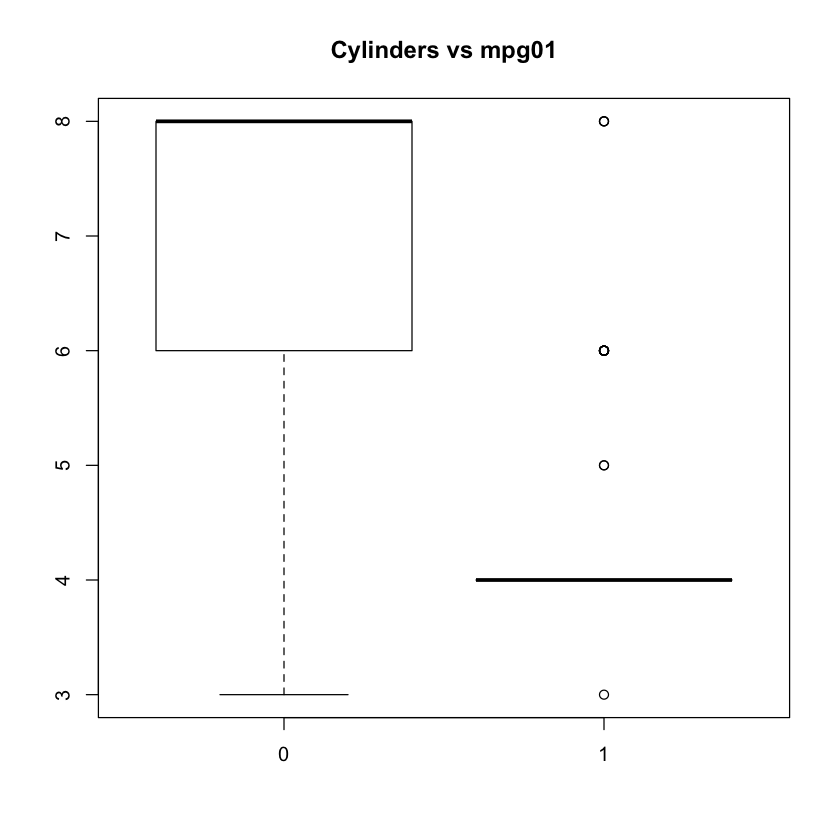

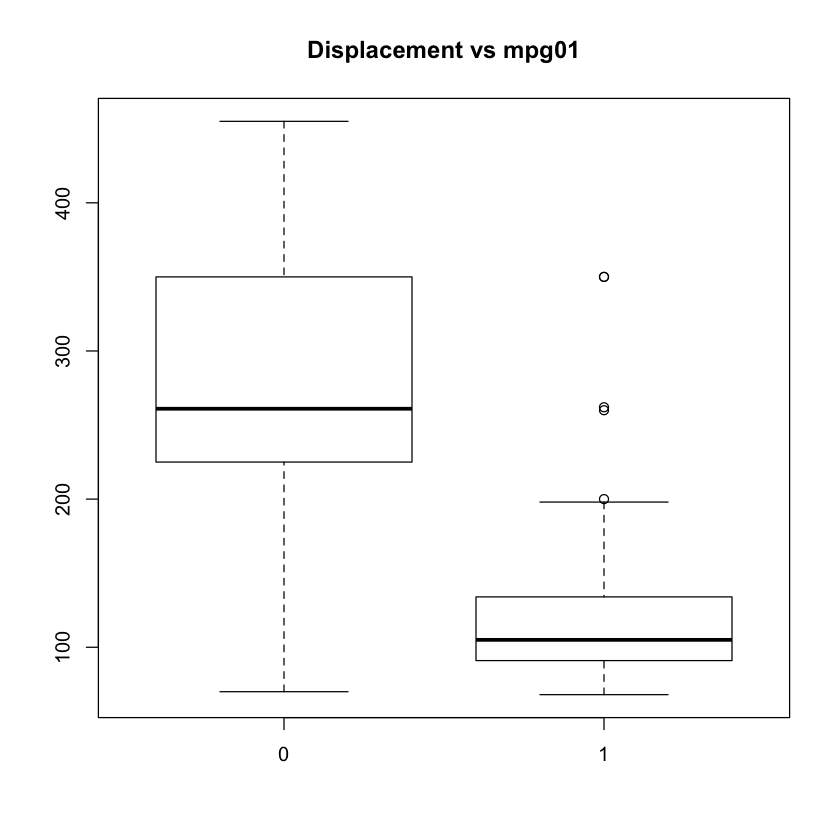

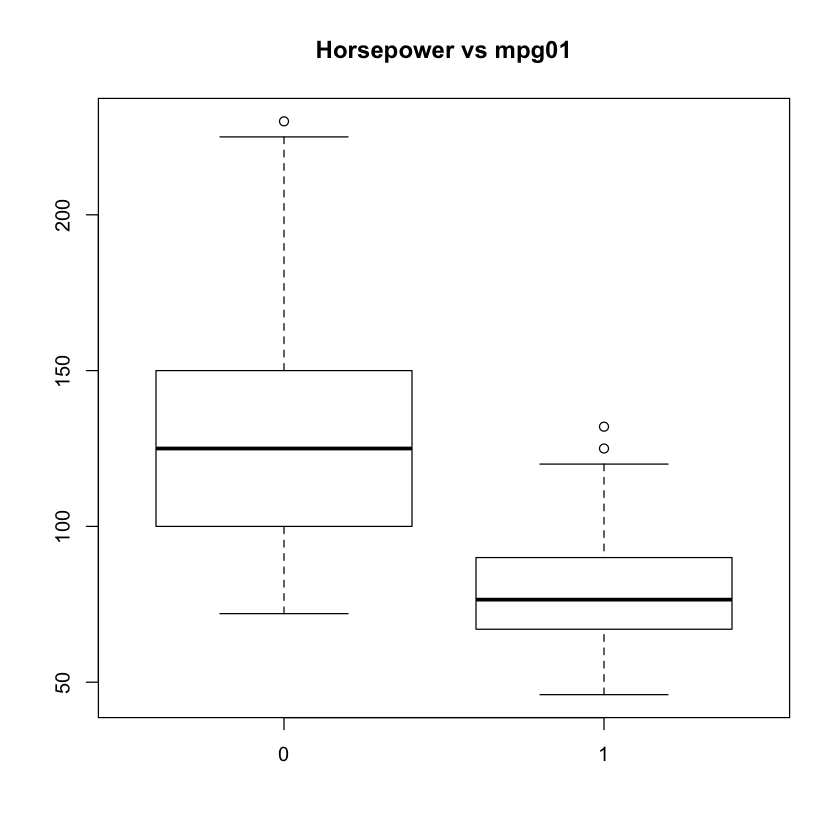

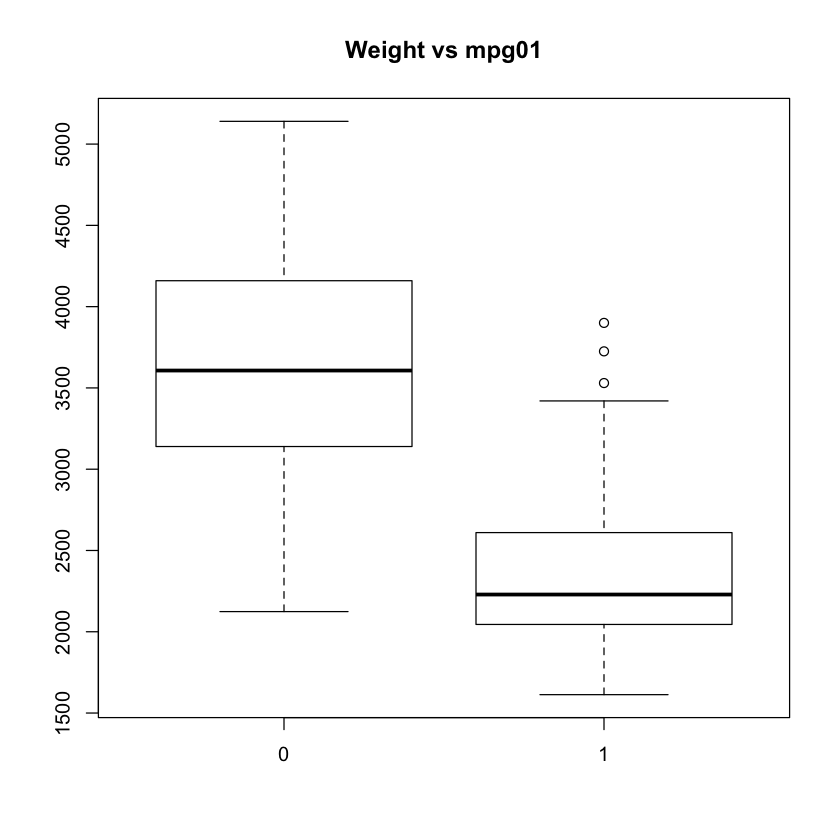

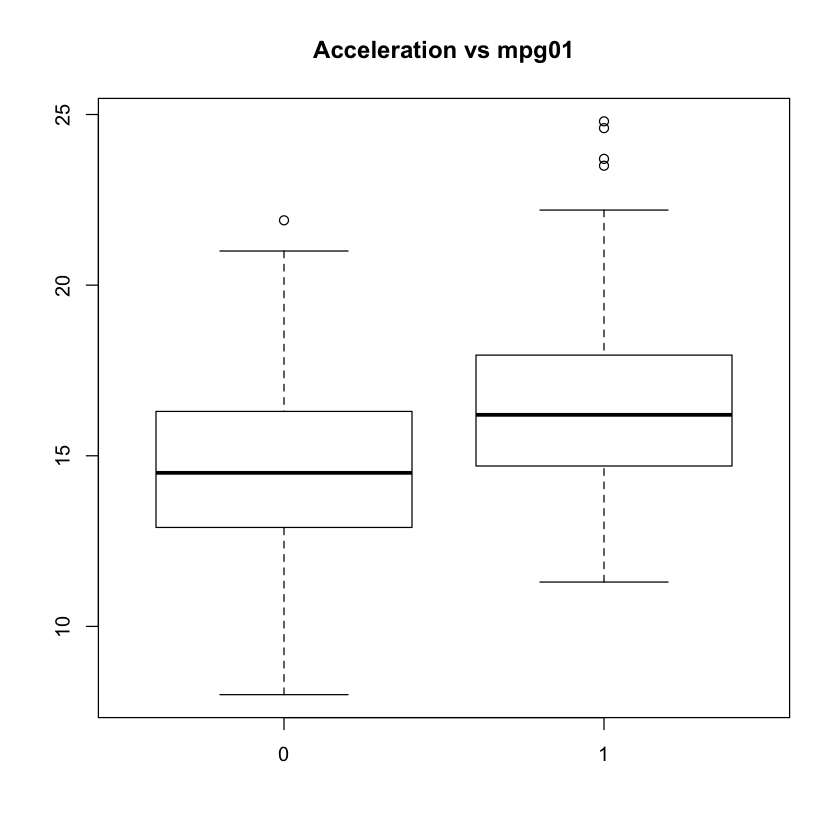

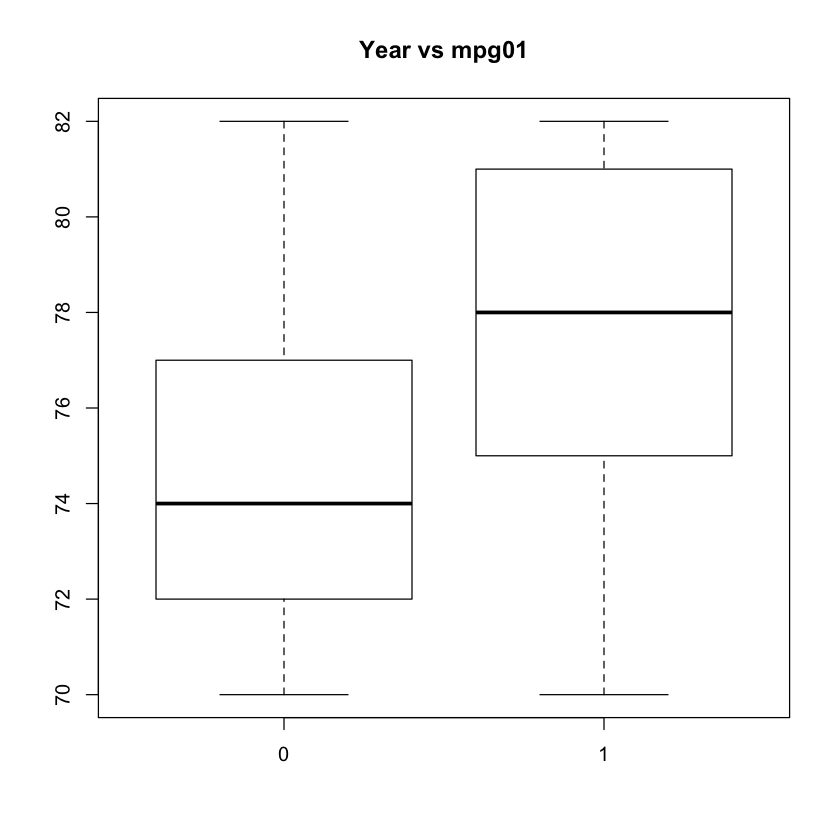

In [61]:
boxplot(cylinders ~ mpg01, data = Auto, main = "Cylinders vs mpg01")
boxplot(displacement ~ mpg01, data = Auto, main = "Displacement vs mpg01")
boxplot(horsepower ~ mpg01, data = Auto, main = "Horsepower vs mpg01")
boxplot(weight ~ mpg01, data = Auto, main = "Weight vs mpg01")
boxplot(acceleration ~ mpg01, data = Auto, main = "Acceleration vs mpg01")
boxplot(year ~ mpg01, data = Auto, main = "Year vs mpg01")

#### c

In [62]:
train=(year %% 2 == 0)
Auto.train=Auto[train, ]
Auto.test=Auto[!train, ]
mpg01.test=mpg01[!train]

#### d

In [63]:
fit.lda=lda(mpg01 ~ cylinders + weight + displacement + horsepower, data=Auto, subset=train)
fit.lda

Call:
lda(mpg01 ~ cylinders + weight + displacement + horsepower, data = Auto, 
    subset = train)

Prior probabilities of groups:
        0         1 
0.4571429 0.5428571 

Group means:
  cylinders   weight displacement horsepower
0  6.812500 3604.823     271.7396  133.14583
1  4.070175 2314.763     111.6623   77.92105

Coefficients of linear discriminants:
                       LD1
cylinders    -0.6741402638
weight       -0.0011465750
displacement  0.0004481325
horsepower    0.0059035377

In [64]:
pred.lda=predict(fit.lda, Auto.test)
table(pred.lda$class, mpg01.test)

   mpg01.test
     0  1
  0 86  9
  1 14 73

In [65]:
mean(pred.lda$class != mpg01.test) # test error rate

[1] 0.1263736

#### e

In [66]:
fit.qda=qda(mpg01 ~ cylinders + weight + displacement + horsepower, data = Auto, subset = train)
fit.qda

Call:
qda(mpg01 ~ cylinders + weight + displacement + horsepower, data = Auto, 
    subset = train)

Prior probabilities of groups:
        0         1 
0.4571429 0.5428571 

Group means:
  cylinders   weight displacement horsepower
0  6.812500 3604.823     271.7396  133.14583
1  4.070175 2314.763     111.6623   77.92105

In [67]:
pred.qda=predict(fit.qda, Auto.test)
table(pred.qda$class, mpg01.test)

   mpg01.test
     0  1
  0 89 13
  1 11 69

In [68]:
mean(pred.qda$class != mpg01.test) # test error rate

[1] 0.1318681

#### f

In [69]:
fit.glm=glm(mpg01 ~ cylinders + weight + displacement + horsepower,
            data = Auto,
            family = binomial, subset = train)
summary(fit.glm)


Call:
glm(formula = mpg01 ~ cylinders + weight + displacement + horsepower, 
    family = binomial, data = Auto, subset = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.48027  -0.03413   0.10583   0.29634   2.57584  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  17.658730   3.409012   5.180 2.22e-07 ***
cylinders    -1.028032   0.653607  -1.573   0.1158    
weight       -0.002922   0.001137  -2.569   0.0102 *  
displacement  0.002462   0.015030   0.164   0.8699    
horsepower   -0.050611   0.025209  -2.008   0.0447 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 289.58  on 209  degrees of freedom
Residual deviance:  83.24  on 205  degrees of freedom
AIC: 93.24

Number of Fisher Scoring iterations: 7


In [70]:
probs=predict(fit.glm, Auto.test, type = "response")
pred.glm=rep(0, length(probs))
pred.glm[probs > 0.5]=1
table(pred.glm, mpg01.test)

        mpg01.test
pred.glm  0  1
       0 89 11
       1 11 71

In [71]:
mean(pred.glm != mpg01.test) # test error rate

[1] 0.1208791

#### g

In [72]:
train.X=cbind(cylinders, weight, displacement, horsepower)[train, ]
test.X=cbind(cylinders, weight, displacement, horsepower)[!train, ]
train.mpg01=mpg01[train]

set.seed(1)
pred.knn=knn(train.X, test.X, train.mpg01, k = 1)
table(pred.knn, mpg01.test)

        mpg01.test
pred.knn  0  1
       0 83 11
       1 17 71

In [73]:
mean(pred.knn != mpg01.test) # test error rate k=1

[1] 0.1538462

In [74]:
pred.knn=knn(train.X, test.X, train.mpg01, k = 10)
table(pred.knn, mpg01.test)

        mpg01.test
pred.knn  0  1
       0 77  7
       1 23 75

In [75]:
mean(pred.knn != mpg01.test) # test error rate k=10

[1] 0.1648352

In [76]:
pred.knn=knn(train.X, test.X, train.mpg01, k = 100)
table(pred.knn, mpg01.test)

        mpg01.test
pred.knn  0  1
       0 81  7
       1 19 75

In [77]:
mean(pred.knn != mpg01.test) # test error k=100

[1] 0.1428571

In [78]:
# 12

In [79]:
# 13

#### grp